# HW 4

In [78]:
from __future__ import division
import numpy as np
import mltools as ml
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import roc_curve, auc

## Problem 1 - Part 1

In [2]:
input_data_matrix = np.array( [[0,0,1,1,0, -1], [1,1,0,1,0, -1], 
                               [0,1,1,1,1, -1], [1,1,1,1,0, -1], 
                               [0,1,0,0,0, -1], [1,0,1,1,1,  1], 
                               [0,0,1,0,0,  1], [1,0,0,0,0,  1], 
                               [1,0,1,1,0,  1], [1,1,1,1,1, -1]] )
X = input_data_matrix[:, 0:-1]
Y = input_data_matrix[:, -1]
p = np.mean(Y > 0)
Hy = -(p * np.log2(p) + (1 - p) * np.log2(1 - p))
print("Entropy of H(y) of the binary class variable y: {}".format(Hy))

Entropy of H(y) of the binary class variable y: 0.9709505944546686


## Problem 1 - Part 2

In [3]:
feature_list = [0.0] * 5
for k in range(5):
    index = X[:, k] > 0
    if(index.sum() == 0 or (1 - index).sum() == 0):
        feature_list[k] = 0
        continue
    p1 = np.mean( Y[index] > 0 ) + 1e-12
    p0 = np.mean( Y[index == False] > 0) + 1e-12
    
    t = np.mean(index) + 1e-12
    feature_list[k] = Hy + t * (p1 * np.log2(p1) + (1-p1) * np.log2(1 - p1)) + (1 - t) * (p0 * np.log2(p0) + (1 - p0) * np.log2(1 - p0))
count = 1
for j in feature_list:
    print("Feature X_i {})  {}".format(count, j))
    count += 1

Feature X_i 1)  0.046439344670192784
Feature X_i 2)  0.6099865469920565
Feature X_i 3)  0.005802149013688251
Feature X_i 4)  0.09127744624110995
Feature X_i 5)  0.005802149013822033


##### I select Feature 2

## Problem 1 - Part 3

In [4]:
print("Feature 2:")
print("\nLeft Data: \n", input_data_matrix[X[:, 1] == 0, :])
print("\nRight Data: \n",input_data_matrix[X[:, 1] == 1, :])

Feature 2:

Left Data: 
 [[ 0  0  1  1  0 -1]
 [ 1  0  1  1  1  1]
 [ 0  0  1  0  0  1]
 [ 1  0  0  0  0  1]
 [ 1  0  1  1  0  1]]

Right Data: 
 [[ 1  1  0  1  0 -1]
 [ 0  1  1  1  1 -1]
 [ 1  1  1  1  0 -1]
 [ 0  1  0  0  0 -1]
 [ 1  1  1  1  1 -1]]


###### In this case we will predict class -1 on the right data and we must split the left data. 
###### Since here 2nd option is the best option, the next feature to split is first feature:

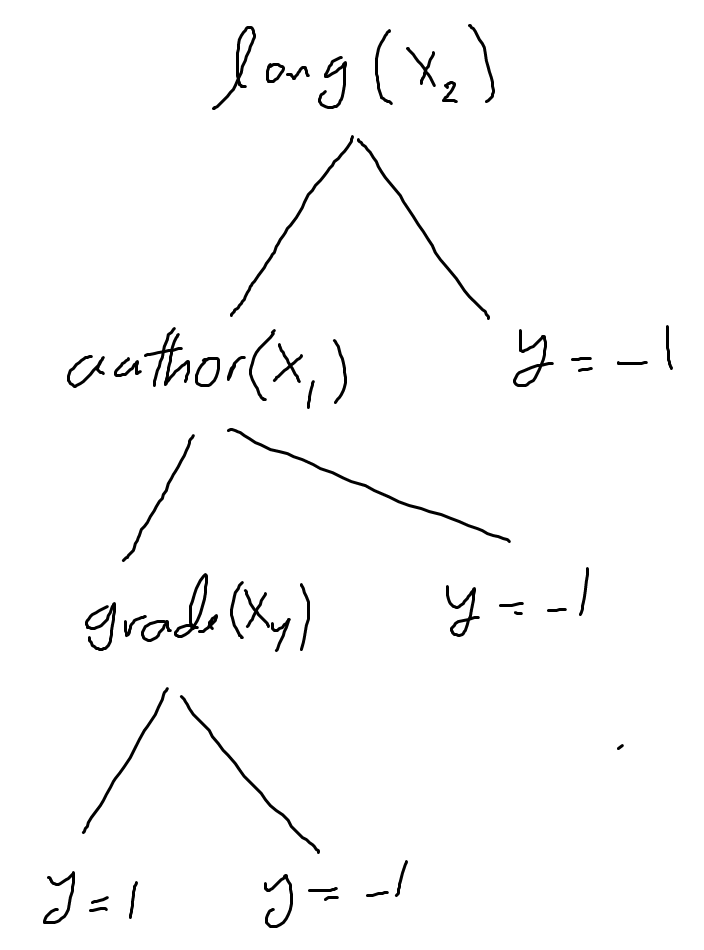

In [5]:
from IPython.display import Image as img
img("problem_1_part_3.jpg")

In [6]:
print("Feature 1: ")
XLeft = input_data_matrix[X[:, 1] == 0, :]
print("\nLeft data: \n",  XLeft[XLeft[:, 0] == 0, :])
print("\nRight data: \n", XLeft[XLeft[:,0]  == 1, :])

Feature 1: 

Left data: 
 [[ 0  0  1  1  0 -1]
 [ 0  0  1  0  0  1]]

Right data: 
 [[1 0 1 1 1 1]
 [1 0 0 0 0 1]
 [1 0 1 1 0 1]]


###### Now we predict class positive 1 on the right data, I have attched my tree at the ned of this PDF.

## Problem 2 - Part 1

In [64]:
X = np.genfromtxt('data/X_train.txt', delimiter = ',')
Y = np.genfromtxt('data/Y_train.txt', delimiter = ',')
X,Y = ml.shuffleData(X,Y)

X = X[:,:41]
print(X.shape)

(7423, 41)


In [65]:
for feature in range(5):
    print("Feature: ", feature + 1)
    print("------------")
    print("Minimum: ", np.min(X[:, feature]))
    print("Maximum: ", np.max(X[:, feature]))
    print("Mean:    ", np.mean(X[:, feature]))
    print("Variance:", np.var(X[:,feature]), "\n")

Feature:  1
------------
Minimum:  0.0
Maximum:  110285.0
Mean:     1321.117413444699
Variance: 6747189.595085321 

Feature:  2
------------
Minimum:  0.0
Maximum:  35.0
Mean:     6.5916745251246125
Variance: 34.70690630279573 

Feature:  3
------------
Minimum:  0.0
Maximum:  51536.0
Mean:     1152.2732372356188
Variance: 5376518.288798101 

Feature:  4
------------
Minimum:  0.0
Maximum:  21768.0
Mean:     234.8262548834703
Variance: 260120.83053297663 

Feature:  5
------------
Minimum:  0.0
Maximum:  27210.0
Mean:     289.75871211100633
Variance: 406615.86511282343 



## Problem 2 - Part 2

In [172]:
Xtr, Ytr = X[0:3711], Y[0:3711]
Xva, Yva = X[3711:7423], Y[3711:7423]
learner = ml.dtree.treeClassify(Xtr, Ytr, maxDepth = 50)
print("Training Data Error: ", learner.err(Xtr,Ytr))
print("Validation Data Error: ", learner.err(Xva,Yva))

Training Data Error:  0.0
Validation Data Error:  0.41029094827586204


## Problem 2 - Part 3

Depth:  0 
----------
Training Data Error:    0.49744004311506335
Validation Data Error:  0.4916487068965517 

Depth:  1 
----------
Training Data Error:    0.3896523848019402
Validation Data Error:  0.39035560344827586 

Depth:  2 
----------
Training Data Error:    0.3896523848019402
Validation Data Error:  0.39035560344827586 

Depth:  3 
----------
Training Data Error:    0.3896523848019402
Validation Data Error:  0.39035560344827586 

Depth:  4 
----------
Training Data Error:    0.36432228509835624
Validation Data Error:  0.3828125 

Depth:  5 
----------
Training Data Error:    0.3497709512260846
Validation Data Error:  0.37176724137931033 

Depth:  6 
----------
Training Data Error:    0.3177041228779305
Validation Data Error:  0.3744612068965517 

Depth:  7 
----------
Training Data Error:    0.3082727027755322
Validation Data Error:  0.37742456896551724 

Depth:  8 
----------
Training Data Error:    0.2899488008623013
Validation Data Error:  0.3811961206896552 

Depth:  9 
-

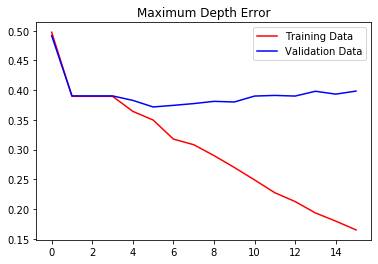

In [173]:
Training_data_list = []
Testing_data_list  = []
for tree_depth in range(16):
    learner_training = ml.dtree.treeClassify(Xtr,Ytr, maxDepth = tree_depth)
    Training_data_list.append(learner_training.err(Xtr,Ytr) )
    Testing_data_list.append(learner_training.err(Xva,Yva) )
    print("Depth: ", tree_depth, "\n----------")
    print("Training Data Error:   ", learner_training.err(Xtr,Ytr))
    print("Validation Data Error: ", learner_training.err(Xva,Yva), "\n")
plt.title("Maximum Depth Error")
plt.plot(Training_data_list, c = "red",label = "Training Data")
plt.plot(Testing_data_list,  c = "blue",label = "Validation Data")
plt.legend()
plt.show()

## Problem 2 - Part 4


Minimum Parent:  1 
----------------------
Training Data Error:    0.0
Validation Data Error:  0.4046336206896552

Minimum Parent:  2 
----------------------
Training Data Error:    0.0
Validation Data Error:  0.4073275862068966

Minimum Parent:  4 
----------------------
Training Data Error:    0.008623012665049851
Validation Data Error:  0.40598060344827586

Minimum Parent:  8 
----------------------
Training Data Error:    0.04284559417946645
Validation Data Error:  0.4140625

Minimum Parent:  16 
----------------------
Training Data Error:    0.09835623821072487
Validation Data Error:  0.40759698275862066

Minimum Parent:  32 
----------------------
Training Data Error:    0.15817838857450822
Validation Data Error:  0.38658405172413796

Minimum Parent:  64 
----------------------
Training Data Error:    0.20937752627324172
Validation Data Error:  0.37823275862068967

Minimum Parent:  128 
----------------------
Training Data Error:    0.2627324171382377
Validation Data Error:  0.3

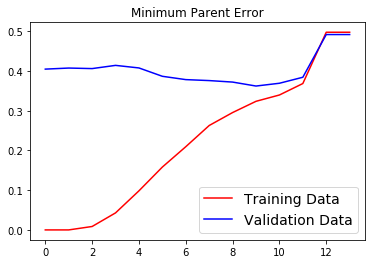

In [174]:
Training_data_list = []
Testing_data_list  = []

for parent_node in  [2 ** parent_node for parent_node in range(0,14)]:
    learner_training = ml.dtree.treeClassify(Xtr, Ytr, maxDepth = 50, minParent = parent_node)
    Training_data_list.append(learner_training.err(Xtr, Ytr))
    Testing_data_list.append(learner_training.err(Xva, Yva))
    print("\nMinimum Parent: " , parent_node, "\n----------------------")
    print("Training Data Error:   ", learner_training.err(Xtr,Ytr))
    print("Validation Data Error: ", learner_training.err(Xva,Yva))
print()
plt.title("Minimum Parent Error")
plt.plot([j for j in range(0,14)], Training_data_list, c = "red", label = "Training Data")
plt.plot([k for k in range(0,14)], Testing_data_list, c = "blue", label = "Validation Data")
plt.legend(fontsize = 14, loc = 4)
plt.show()

## Problem 2 - Part 6

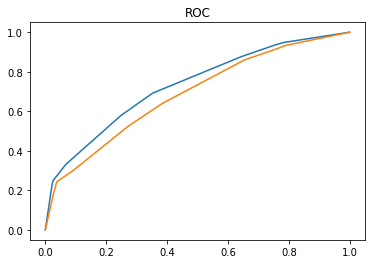


AUC Training Data:    0.7333215677046565
AUC Validation Data:  0.6897836877280985


In [60]:
learner_training = ml.dtree.treeClassify(Xtr, Ytr, maxDepth = 40, minParent = 900)
Triaing_ROC    = learner_training.roc(Xtr, Ytr)
Validation_ROC = learner_training.roc(Xva, Yva)
plt.plot(Triaing_ROC[0], Triaing_ROC[1], Validation_ROC[0], Validation_ROC[1])
plt.title("ROC")
plt.show()
Training_AUC   = learner_training.auc(Xtr, Ytr)
Validation_AUC = learner_training.auc(Xva, Yva)
print("\nAUC Training Data:   ", Training_AUC)
print("AUC Validation Data: ", Validation_AUC)

## Problem 2 - Part 7

In [ ]:
Xtr = np.genfromtxt('data/X_train.txt', delimiter = ",")
Ytr = np.genfromtxt('data/Y_train.txt', delimiter = ",")
Xtr, Ytr = ml.shuffleData(Xtr, Ytr)
learner  = ml.dtree.treeClassify(Xtr, Ytr, maxDepth = 50, minParent = 1080)
Xte = np.genfromtxt('data/X_test.txt', delimiter= ',')
Yte = np.vstack((np.arange(Xte.shape[0]), learner.predictSoft(Xte)[:, 1])).T
# Output a file with two columns, a row ID and a confidence in class 1:
np.savetxt('Y_submit.txt', Yte, '%d, %.2f', header = 'Id,Predicted', delimiter=',')

## Problem 3

#### Problem 3 - Option 1

##### Problem 3 - Option 1 - Part 1


(1) Ensemble: 
----------------------------------
MSE_TRAINING = 0.2471032066828348
MSE_TESTING = 0.43211206896551724

(5) Ensemble: 
----------------------------------
MSE_TRAINING = 0.12323362974939371
MSE_TESTING = 0.2542564655172414

(10) Ensemble: 
----------------------------------
MSE_TRAINING = 0.10923740231743466
MSE_TESTING = 0.2335668103448276

(25) Ensemble: 
----------------------------------
MSE_TRAINING = 0.09489668552950688
MSE_TESTING = 0.22389008620689657



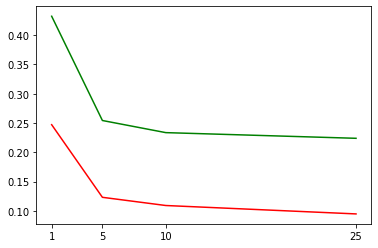

In [138]:
ensemble = [None] * 25
Y_training_hat = np.zeros((np.size(Ytr), 25))
Y_validation_hat = np.zeros((np.size(Yva), 25))

for i in range(25):
    Xa,Ya = ml.bootstrapData(Xtr,Ytr)
    ensemble[i] = ml.dtree.treeClassify(Xa, Ya, maxDepth = 15, minLeaf = 4, nFeatures = 8)
    Y_training_hat[:, i]   = ensemble[i].predict(Xtr)
    Y_validation_hat[:, i] = ensemble[i].predict(Xva)

MSE_Training = []
MSE_Testing  = []
input_array  = [1, 5, 10, 25]

for j, k in enumerate(input_array):    
    MSE_Training.append(np.mean((Ytr - np.mean(Y_training_hat[:, 0:k], 1))  ** 2 ))     
    MSE_Testing.append(np.mean((Yva - np.mean(Y_validation_hat[:, 0:k], 1)) ** 2 ))
    print("\n(" + str(k) + ") Ensemble: \n----------------------------------\nMSE_TRAINING = " + str(MSE_Training[j]) 
          + "\nMSE_TESTING = " + str(MSE_Testing[j]))
print()
_, axis = plt.subplots()
axis.plot(input_array, MSE_Training, c = 'red')
axis.plot(input_array, MSE_Testing, c = 'green')
axis.set_xticks(input_array)
plt.show()

##### Problem 3 - Option 1 - Part 2

In [169]:
ensemble_two = [None] * 25
Xva = np.genfromtxt("data/X_test.txt", delimiter = ",")
Y_prediction = np.zeros((np.size(Xva, 0), 1))
for i in range(25):
    Xa,Ya = ml.bootstrapData(Xtr,Ytr)
    ensemble_two[i] = ml.dtree.treeClassify(Xa, Ya, maxDepth = 8, minLeaf = 128, nFeatures = 8, 
                                            minParent = 512)
    Y_prediction = Y_prediction + ensemble_two[i].predictSoft(Xva)
Y_prediction = Y_prediction / 25
print("Result of AUC(Acuuracy Rate)/ Performance Rate after 25 learners = " + str(ensemble_two[24].auc(Xa, Ya)))
np.savetxt('Y_prediction_submit.txt', np.vstack((np.arange(len(Y_prediction)) , Y_prediction[:,1])).T,'%d, %.2f', 
            header= 'ID,Prob1', comments = '',delimiter = ',');

Result of AUC(Acuuracy Rate)/ Performance Rate after 25 learners = 0.7192011673967736


Kaggle score for Y_submit.txt prediction file: 0.73408

## Problem 3

###### For this assignemnt, I mostly used the lecture notes, discussion and Piazza. Piazza and lecture notes were two really helpful
###### resources and I asked questions on Piazza and used my friends help as well.